##### Deepiction V.0.4

## **Train and Test Deep Neural Networks**
- Tensorflow: unet, resnet
- Pytorch: unet_ten, unet_n2n

**1. Import the dependencies**

In [11]:
import numpy as np
import os
from deepiction.imagedataset import ImageDataset
from deepiction.prediction import Prediction
from deepiction.training import Training
from deepiction.tools import report_resources
import warnings
warnings.filterwarnings("ignore")
report_resources()


Resources
Current path: /Users/sage/Desktop/deepiction/v.0.4
GPU available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow Version:  2.11.0
Pytorch GPU available:  mps


**2. Selection of the dataset**
- task
    - binary: pixel classification, input 1 grayscale channel, output mask class=0 or class=1
    - nclass: pixel classification in n class, input 1 grayscale channel, output labels
    - regress: regression, input 1 grayscale channel, output 1 grayscale channel
- norm: (training, test)
    - minmax
    - div255
    - none

In [12]:
#dataname, task, norm = 'simulation-object-256-8-2', 'nclass', ('minmax', 'none')
#dataname, task, norm = 'simulation-dmap-256-8-1', 'regres', ('minmax', 'none')
#dataname, task, norm = 'simulation-class-256-8-3', 'nclass', ('minmax', 'none')
#dataname, task, norm = 'degradation-noisy-p50', 'regres', ('none', 'none')
dataname, task, norm = 'simulation-binary-256-8-1', 'binary', ('minmax', 'none')
#dataname, task, norm = 'ctc-glioblastoma', 'binary', ('minmax', 'none')

datapath  = f'../datasets/{dataname}/'

# Training dataset
dataset = ImageDataset(datapath)
dataset.load_pairs(100, 'train/sources', 'train/targets')
dataset.normalization(norm)
dataset.report()


Dataset: Load pairs of images
../datasets/simulation-binary-256-8-1/train/sources: 100 files
../datasets/simulation-binary-256-8-1/train/targets: 100 files

Summary Source: (100, 256, 256, 1) 256  <-> Target:  (100, 256, 256, 1) 2


,Filename,Source,Type S,Min S,Max S,Mean S,Std S,Target,Type T,Min T,Max T,Mean T,Std T
0,0000.tif,"(256, 256, 1)",float64,0,1,0.438,0.1,"(256, 256, 1)",uint8,0,1,0.292,0.455
1,0001.tif,"(256, 256, 1)",float64,0.1,1,0.44,0.103,"(256, 256, 1)",uint8,0,1,0.295,0.456
2,0002.tif,"(256, 256, 1)",float64,0,1,0.438,0.099,"(256, 256, 1)",uint8,0,1,0.293,0.455
3,0003.tif,"(256, 256, 1)",float64,0,1,0.438,0.1,"(256, 256, 1)",uint8,0,1,0.286,0.452
4,0004.tif,"(256, 256, 1)",float64,0,1,0.435,0.098,"(256, 256, 1)",uint8,0,1,0.278,0.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0095.tif,"(256, 256, 1)",float64,0.1,1,0.44,0.101,"(256, 256, 1)",uint8,0,1,0.292,0.455
96,0096.tif,"(256, 256, 1)",float64,0.1,1,0.437,0.101,"(256, 256, 1)",uint8,0,1,0.283,0.45
97,0097.tif,"(256, 256, 1)",float64,0,1,0.436,0.099,"(256, 256, 1)",uint8,0,1,0.281,0.449
98,0098.tif,"(256, 256, 1)",float64,0,1,0.44,0.104,"(256, 256, 1)",uint8,0,1,0.287,0.453


**3. Selection of the framework and the network**
- PT (tensorflow) PT-unet-ten, PT-unet-n2n
- TF (tensorflow) TF-unet, TF-resnet

In [13]:
#netname, extension = 'PT-unet-ten', '.pt'  # PT-unet-n2n
netname, extension = 'TF-unet', '.hdf5'  # TF-resnet

**4. Training**


Build network TF-unet on TF batchnorm:False
Input  (256, 256, 1)
Number of outputs  1
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_30 (Conv2D)             (None, 256, 256, 16  160         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 activation_28 (Activation)     (None, 256, 256, 16  0           ['conv2d_30[0][0]']              
       

 activation_39 (Activation)     (None, 128, 128, 32  0           ['conv2d_41[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_transpose_8 (Conv2DTran  (None, 256, 256, 16  2064       ['activation_39[0][0]']          
 spose)                         )                                                                 
                                                                                                  
 concatenate_8 (Concatenate)    (None, 256, 256, 32  0           ['conv2d_transpose_8[0][0]',     
                                )                                 'activation_29[0][0]']          
                                                                                                  
 conv2d_42 (Conv2D)             (None, 256, 256, 16  4624        ['concatenate_8[0][0]']          
          

 concatenate (Concatenate)      (None, 64, 64, 128)  0           ['conv2d_transpose[0][0]',       
                                                                  'activation_5[0][0]']           
                                                                                                  
 conv2d_8 (Conv2D)              (None, 64, 64, 64)   73792       ['concatenate[0][0]']            
                                                                                                  
 activation_8 (Activation)      (None, 64, 64, 64)   0           ['conv2d_8[0][0]']               
                                                                                                  
 conv2d_9 (Conv2D)              (None, 64, 64, 64)   36928       ['activation_8[0][0]']           
                                                                                                  
 activation_9 (Activation)      (None, 64, 64, 64)   0           ['conv2d_9[0][0]']               
          

5/5 [==============================] - ETA: 0s - loss: 0.0739 - mse: 0.0209
Epoch 11: saving model to ../reports/simulation-binary-256-8-1/TF-unet-3P-16C-21E/model_best.hdf5
5/5 [==============================] - 1s 165ms/step - loss: 0.0739 - mse: 0.0209 - val_loss: 0.0685 - val_mse: 0.0195
Epoch 12/21
5/5 [==============================] - ETA: 0s - loss: 0.0684 - mse: 0.0197
Epoch 12: saving model to ../reports/simulation-binary-256-8-1/TF-unet-3P-16C-21E/model_best.hdf5
5/5 [==============================] - 1s 165ms/step - loss: 0.0684 - mse: 0.0197 - val_loss: 0.0651 - val_mse: 0.0189
Epoch 13/21
5/5 [==============================] - ETA: 0s - loss: 0.0640 - mse: 0.0186
Epoch 13: saving model to ../reports/simulation-binary-256-8-1/TF-unet-3P-16C-21E/model_best.hdf5
5/5 [==============================] - 1s 167ms/step - loss: 0.0640 - mse: 0.0186 - val_loss: 0.0599 - val_mse: 0.0174
Epoch 14/21
5/5 [==============================] - ETA: 0s - loss: 0.0596 - mse: 0.0174
Epoch 14:

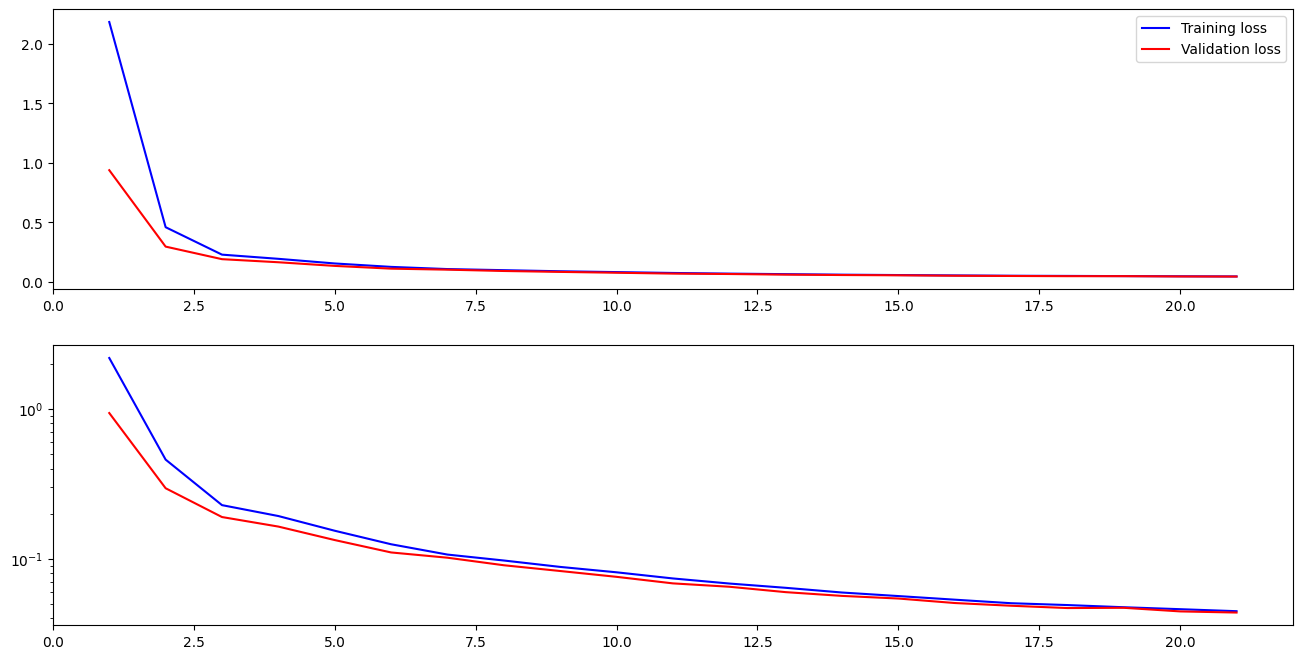

In [14]:
epochs = 21
npools, nchannels = 3, 16
batchnorm, dropout = False, 0
batchsize, learningrate = 16, 0.001

trainname = f'{netname}-{npools}P-{nchannels}C-{epochs}E'
reportpath = f'../reports/{dataname}/{trainname}/'
pretrainedpath = f'../reports/{dataname}/{trainname}/'

if task == 'binary': activation, loss, metric, measure, noutputs = 'sigmoid', 'bce', 'mse', 'iou', 1
if task == 'nclass': activation, loss, metric, measure, noutputs = 'softmax', 'cce', 'accuracy', 'iou', dataset.getNumberOfClasses()  
if task == 'regres': activation, loss, metric, measure, noutputs = 'relu', 'mse', 'mse', 'psnr', 1

dataset.split(0.25)
if task == 'nclass': dataset.makeClassesAsChannels()   
training = Training(dataset, reportpath)
training.buildnet(netname, noutputs, nchannels, npools, batchnorm, dropout, activation)

if True: # Finetuning
    training.load_pretrained(os.path.join(pretrainedpath, 'model_best' + extension))
training.train(epochs, batchsize, learningrate, loss, metric)

**5. Test**


Dataset: Load pairs of images
../datasets/simulation-binary-256-8-1/test/sources: 101 files
../datasets/simulation-binary-256-8-1/test/targets: 101 files

Summary Source: (5, 256, 256, 1) 254  <-> Target:  (5, 256, 256, 1) 2

Load ../reports/simulation-binary-256-8-1/TF-unet-3P-16C-21E/model_best.hdf5
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  160         ['input_1[0][0]']                
                                )                                                      

                                )                                                                 
                                                                                                  
 activation_11 (Activation)     (None, 128, 128, 32  0           ['conv2d_11[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_transpose_2 (Conv2DTran  (None, 256, 256, 16  2064       ['activation_11[0][0]']          
 spose)                         )                                                                 
                                                                                                  
 concatenate_2 (Concatenate)    (None, 256, 256, 32  0           ['conv2d_transpose_2[0][0]',     
                                )                                 'activation_1[0][0]']           
          

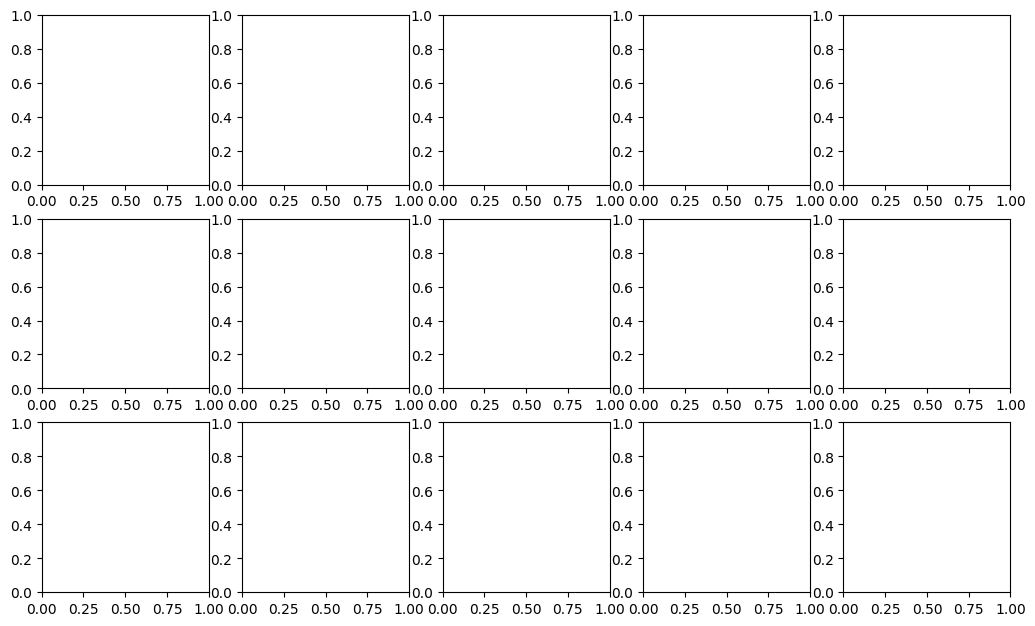

In [15]:
datatest = ImageDataset(datapath)   
datatest.load_pairs(5, 'test/sources', 'test/targets')
datatest.normalization(norm)
#datatest.report()

if task == 'binary': measure = 'iou'
if task == 'nclass': measure = 'iou'  
if task == 'regres': measure = 'psnr'

prediction = Prediction(datatest, reportpath, 'model_best' + extension)
preds = prediction.test()
if task == 'binary': preds = np.where(preds > 0.5, 1, 0)
if task == 'nclass': preds = np.expand_dims(np.argmax(preds, axis=3), axis=3)
prediction.print_results(preds, task != 'regres')
prediction.figure_results(preds, measure)
prediction.save_results(preds)